### Changing to the main directory

In [ ]:
%cd ..

In [ ]:
!pwd

### Import Necessary Libraries

In [3]:
import pandas as pd 
from image_classification import compute_multiclass_metrics, plot_confusion_matrix


results_ollama = pd.read_csv('data/results_ollama.csv')
results_ollama_cleaned = pd.read_csv('data/results_ollama_cleaned.csv')
results_openai = pd.read_csv('data/results_openai.csv')
results_gemini = pd.read_csv('data/results_gemini.csv')

In [4]:
true_categories = results_ollama['animal'].to_list()

### Computation of Accuracy, Precision, Recall, and F1-Score

Results before normalization

In [5]:
final_results = []
time_results = []

for column in results_ollama.columns:
    if '_result' in column:
        result = compute_multiclass_metrics(true_categories, results_ollama[column].to_list())
        result['model'] = column.replace('_result', '')
        final_results.append(result)
    
    if '_elapsed_time' in column:
        time_result = {}
        time_result['model'] = column.replace('_elapsed_time', '')
        time_result['avg_time_taken'] = results_ollama[column].mean()
        time_results.append(time_result)

# Convert results to DataFrames
metrics_df = pd.DataFrame(final_results)
timing_df = pd.DataFrame(time_results)

# Merge the metrics and timing results on the model column
final_results_ollama = pd.merge(metrics_df, timing_df, on='model', how='left')
final_results_ollama

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12

,accuracy,precision,recall,f1,model,avg_time_taken
0,0.932,0.953388,0.932000,0.929081,llama3.2-vision,1.353685
1,0.988,0.769231,0.760000,0.764321,minicpm-v,0.388680
2,0.824,0.554349,0.484706,0.491606,llava-llama3,0.199933
3,0.908,0.743574,0.698462,0.713363,llava,0.172022
4,0.976,0.766272,0.750769,0.758038,llava:13b,0.232622


Results after normalization

In [7]:
final_results = []
time_results = []

for column in results_ollama_cleaned.columns:
    if '_result' in column:
        result = compute_multiclass_metrics(true_categories, results_ollama_cleaned[column].to_list())
        result['model'] = column.replace('_result', '')
        final_results.append(result)
    
    if '_elapsed_time' in column:
        time_result = {}
        time_result['model'] = column.replace('_elapsed_time', '')
        time_result['avg_time_taken'] = results_ollama[column].mean()
        time_results.append(time_result)

# Convert results to DataFrames
metrics_df = pd.DataFrame(final_results)
timing_df = pd.DataFrame(time_results)

# Merge the metrics and timing results on the model column
final_results_ollama_cleaned = pd.merge(metrics_df, timing_df, on='model', how='left')
final_results_ollama_cleaned

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy,precision,recall,f1,model,avg_time_taken
0,0.932,0.953388,0.932000,0.929081,llama3.2-vision,1.353685
1,1.000,1.000000,1.000000,1.000000,minicpm-v,0.388680
2,0.896,0.628880,0.597333,0.590020,llava-llama3,0.199933
3,0.952,0.805539,0.793333,0.797425,llava,0.172022
4,0.980,0.830128,0.816667,0.822979,llava:13b,0.232622


In [8]:
final_results = []
time_results = []

for column in results_gemini.columns:
    if '_result' in column:
        result = compute_multiclass_metrics(true_categories, results_gemini[column].to_list())
        result['model'] = column.replace('_result', '')
        final_results.append(result)
    
    if '_elapsed_time' in column:
        time_result = {}
        time_result['model'] = column.replace('_elapsed_time', '')
        time_result['avg_time_taken'] = results_gemini[column].mean()
        time_results.append(time_result)

# Convert results to DataFrames
metrics_df = pd.DataFrame(final_results)
timing_df = pd.DataFrame(time_results)

# Merge the metrics and timing results on the model column
final_results_gemini = pd.merge(metrics_df, timing_df, on='model', how='left')
final_results_gemini

,accuracy,precision,recall,f1,model,avg_time_taken
0,1.0,1.0,1.0,1.0,gemini-1.5-pro,2.652047
1,1.0,1.0,1.0,1.0,gemini-1.5-flash-8b,2.528480
2,1.0,1.0,1.0,1.0,gemini-1.5-flash,2.286159


In [9]:
final_results = []
time_results = []

for column in results_openai.columns:
    if '_result' in column:
        result = compute_multiclass_metrics(true_categories, results_openai[column].to_list())
        result['model'] = column.replace('_result', '')
        final_results.append(result)
    
    if '_elapsed_time' in column:
        time_result = {}
        time_result['model'] = column.replace('_elapsed_time', '')
        time_result['avg_time_taken'] = results_openai[column].mean()
        time_results.append(time_result)

# Convert results to DataFrames
metrics_df = pd.DataFrame(final_results)
timing_df = pd.DataFrame(time_results)

# Merge the metrics and timing results on the model column
final_results_openai = pd.merge(metrics_df, timing_df, on='model', how='left')
final_results_openai

,accuracy,precision,recall,f1,model,avg_time_taken
0,0.996,0.996154,0.996,0.995998,gpt-4o-mini,2.772379
1,1.000,1.000000,1.000,1.000000,gpt-4o,2.415764


In [13]:
final_results = pd.concat([final_results_ollama, final_results_gemini, final_results_openai])
final_results.reset_index(drop=True, inplace=True)
final_results

,accuracy,precision,recall,f1,model,avg_time_taken
0,0.932,0.953388,0.932000,0.929081,llama3.2-vision,1.353685
1,0.988,0.769231,0.760000,0.764321,minicpm-v,0.388680
2,0.824,0.554349,0.484706,0.491606,llava-llama3,0.199933
3,0.908,0.743574,0.698462,0.713363,llava,0.172022
4,0.976,0.766272,0.750769,0.758038,llava:13b,0.232622
5,1.000,1.000000,1.000000,1.000000,gemini-1.5-pro,2.652047
6,1.000,1.000000,1.000000,1.000000,gemini-1.5-flash-8b,2.528480
7,1.000,1.000000,1.000000,1.000000,gemini-1.5-flash,2.286159
8,0.996,0.996154,0.996000,0.995998,gpt-4o-mini,2.772379
9,1.000,1.000000,1.000000,1.000000,gpt-4o,2.415764


In [12]:
final_results_v2 = pd.concat([final_results_ollama_cleaned, final_results_gemini, final_results_openai])
final_results_v2.reset_index(drop=True, inplace=True)
final_results_v2

,accuracy,precision,recall,f1,model,avg_time_taken
0,0.932,0.953388,0.932000,0.929081,llama3.2-vision,1.353685
1,1.000,1.000000,1.000000,1.000000,minicpm-v,0.388680
2,0.896,0.628880,0.597333,0.590020,llava-llama3,0.199933
3,0.952,0.805539,0.793333,0.797425,llava,0.172022
4,0.980,0.830128,0.816667,0.822979,llava:13b,0.232622
5,1.000,1.000000,1.000000,1.000000,gemini-1.5-pro,2.652047
6,1.000,1.000000,1.000000,1.000000,gemini-1.5-flash-8b,2.528480
7,1.000,1.000000,1.000000,1.000000,gemini-1.5-flash,2.286159
8,0.996,0.996154,0.996000,0.995998,gpt-4o-mini,2.772379
9,1.000,1.000000,1.000000,1.000000,gpt-4o,2.415764


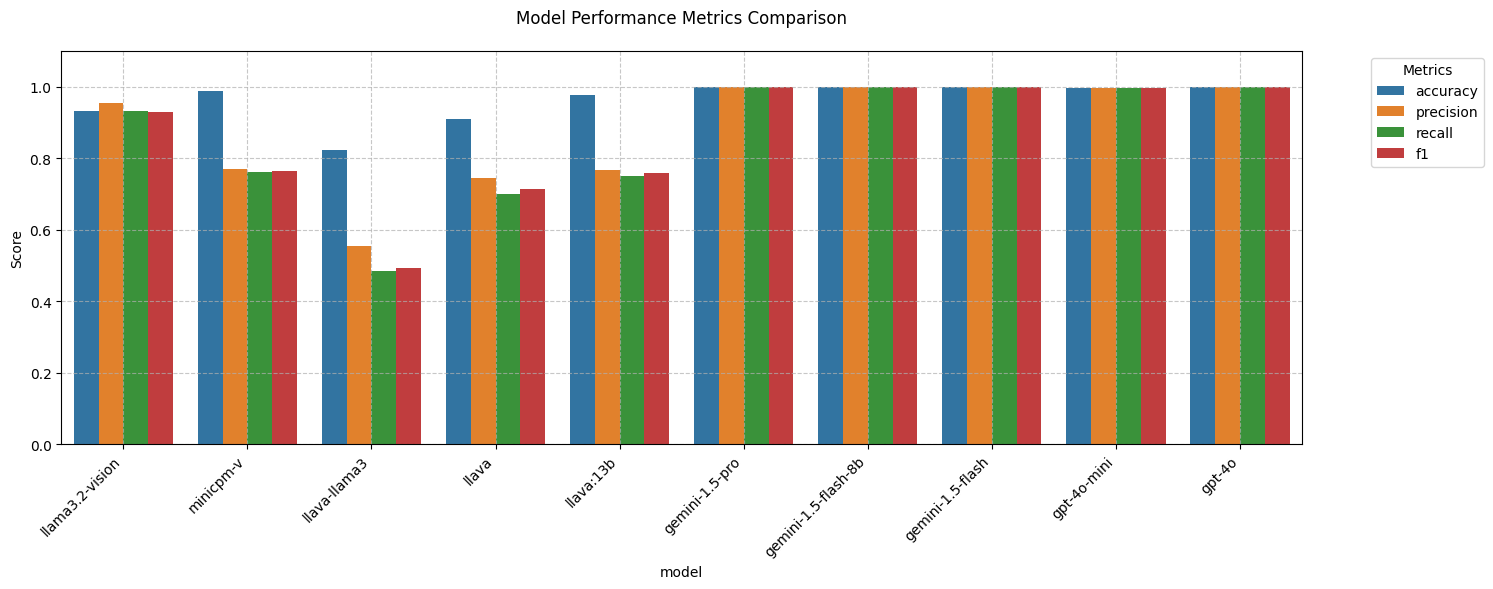

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove duplicate rows based on 'model'
df = final_results.drop_duplicates(subset=['model'])

# Plot performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
df_melted = df.melt(id_vars=['model'], value_vars=metrics, 
                    var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 6))
sns.barplot(data=df_melted, x='model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Comparison - Before Normalizing Results from Ollama models', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

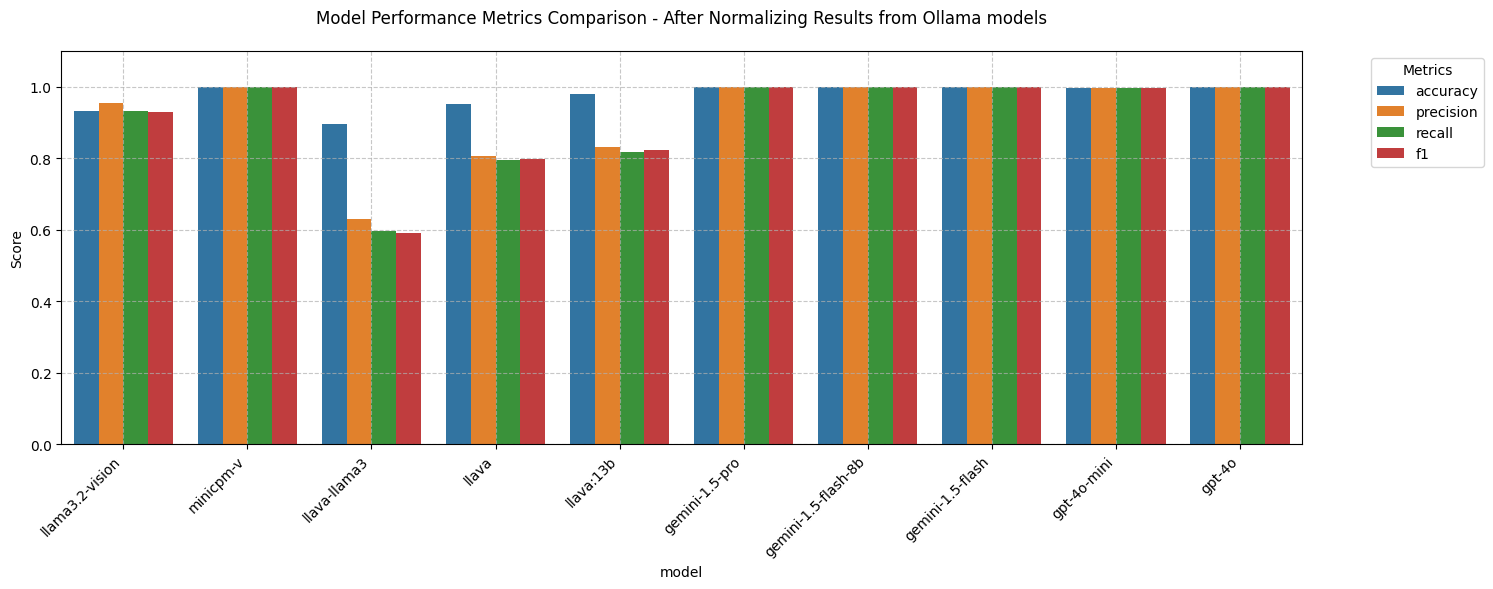

In [18]:
# Remove duplicate rows based on 'model'
df = final_results_v2.drop_duplicates(subset=['model'])

# Plot performance metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
df_melted = df.melt(id_vars=['model'], value_vars=metrics, 
                    var_name='Metric', value_name='Score')

plt.figure(figsize=(15, 6))
sns.barplot(data=df_melted, x='model', y='Score', hue='Metric')
plt.title('Model Performance Metrics Comparison - After Normalizing Results from Ollama models', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

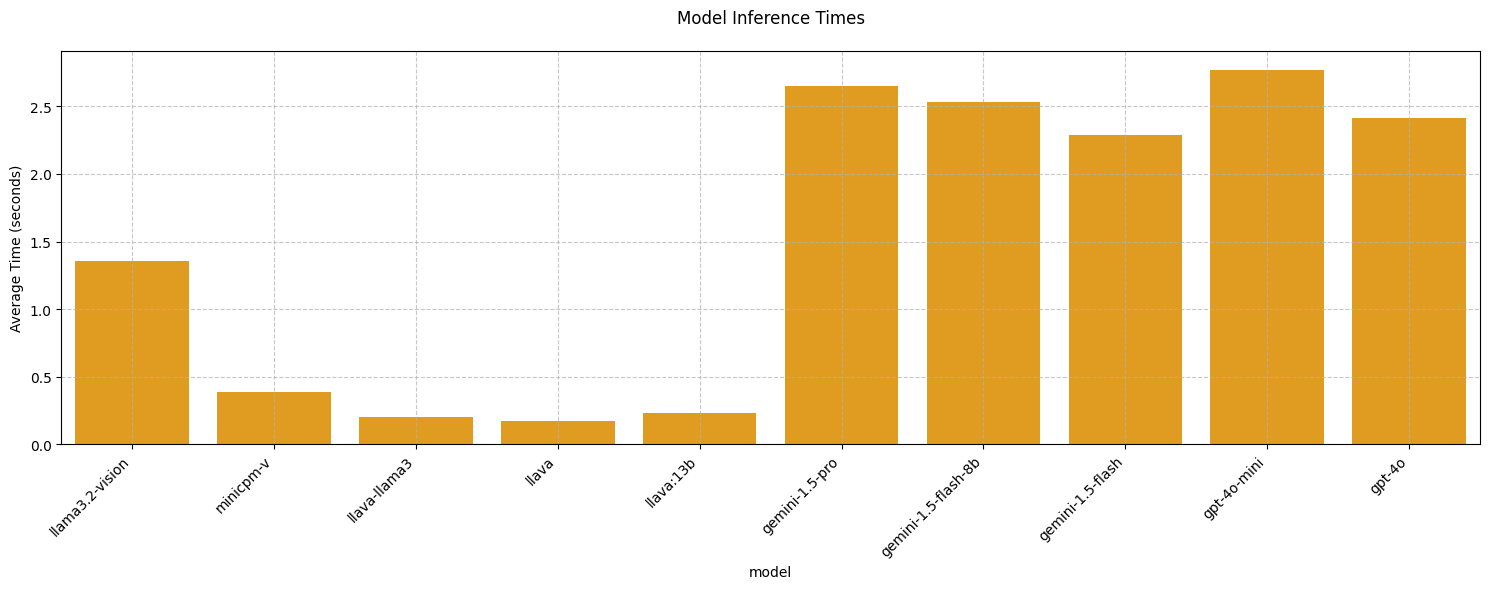

In [19]:
# Plot inference times
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='model', y='avg_time_taken', color='orange')
plt.title('Model Inference Times', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Plotting Confusion Matrix

In [20]:
predicted_columns_ollama = [column for column in results_ollama.columns if '_result' in column]
predicted_columns_ollama_cleaned = [column for column in results_ollama_cleaned.columns if '_result' in column]
predicted_columns_openai = [column for column in results_openai.columns if '_result' in column]
predicted_columns_gemini = [column for column in results_gemini.columns if '_result' in column]

Confusion Matrix of models via Ollama before normalizing results

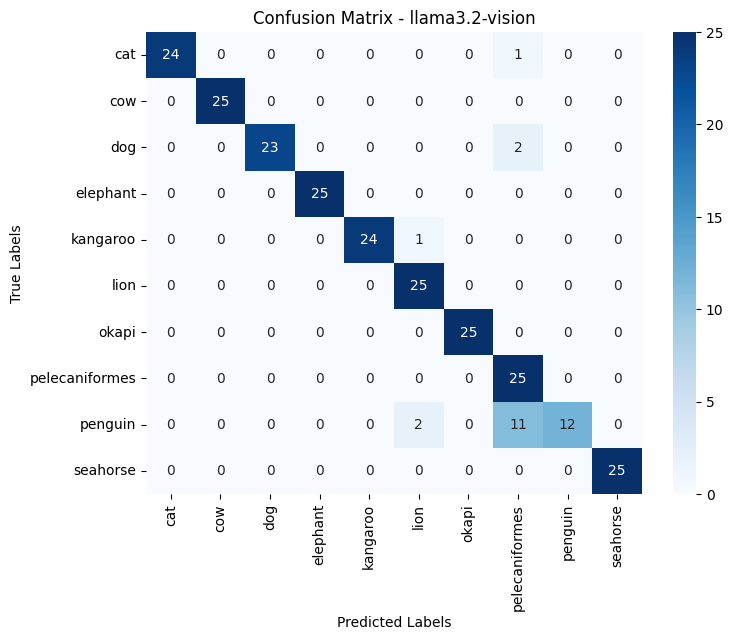

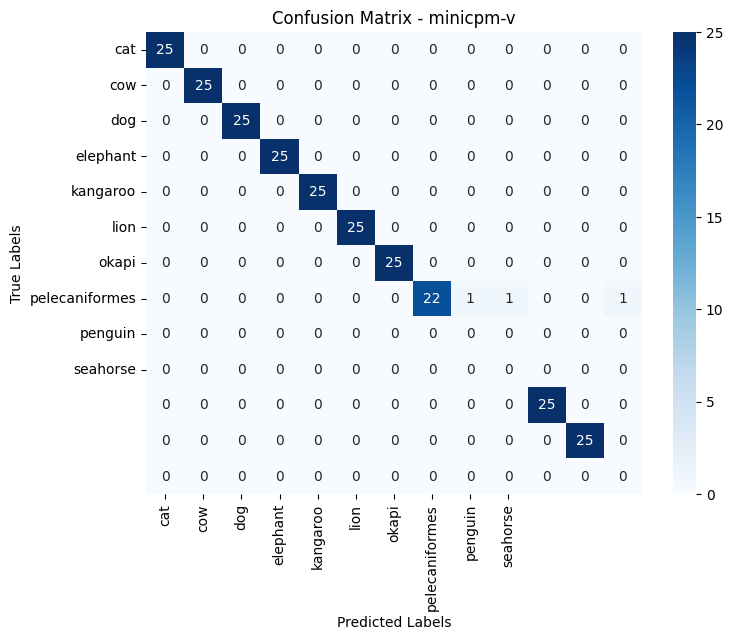

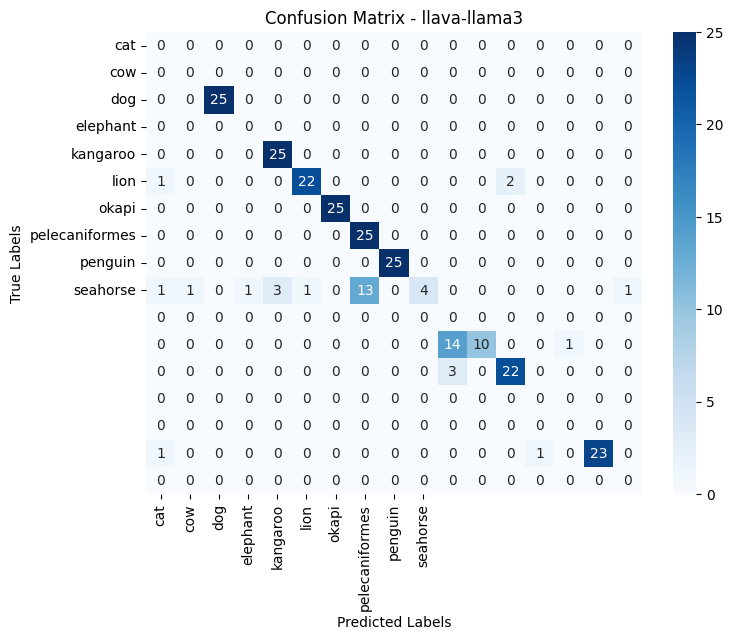

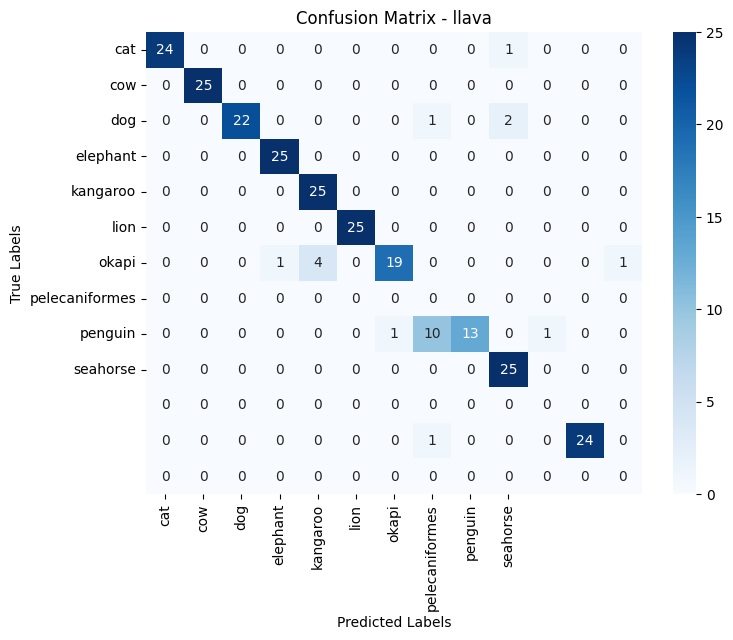

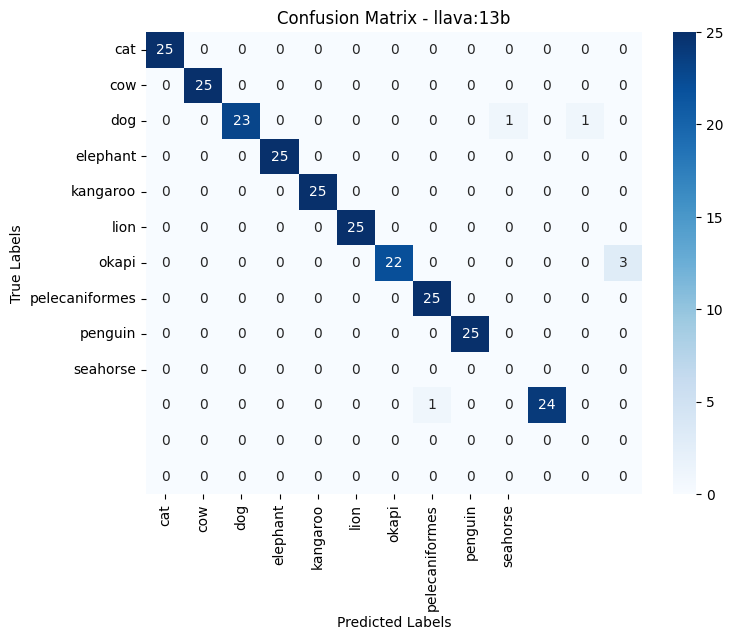

In [21]:
# Get unique models from the final_results
unique_models = final_results['model'].unique()

# Create a mapping of model names to their result columns
model_to_column = {model: f"{model}_result" for model in unique_models}

# Plot confusion matrix for each unique model
for model in unique_models:
    column = model_to_column[model]
    if column in results_ollama.columns:
        plot_confusion_matrix(true_categories, results_ollama[column], model)

Confusion Matrix of models via Ollama after normalizing results

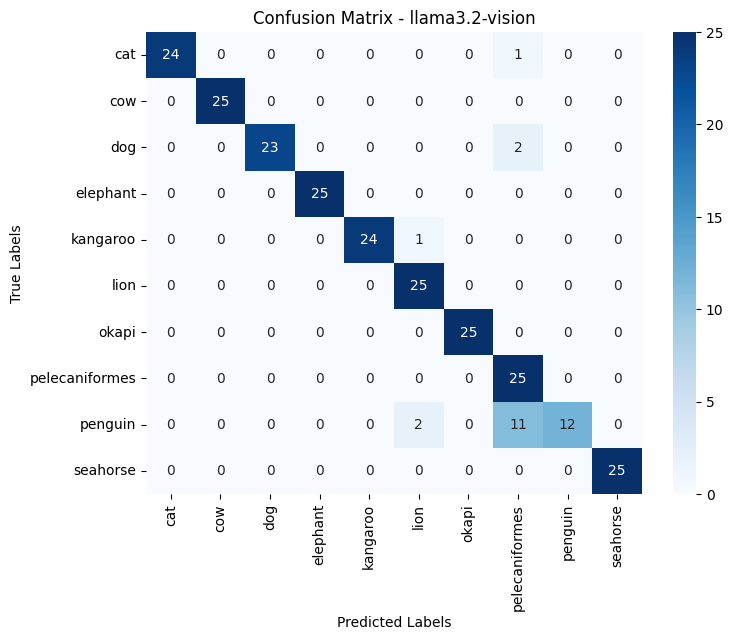

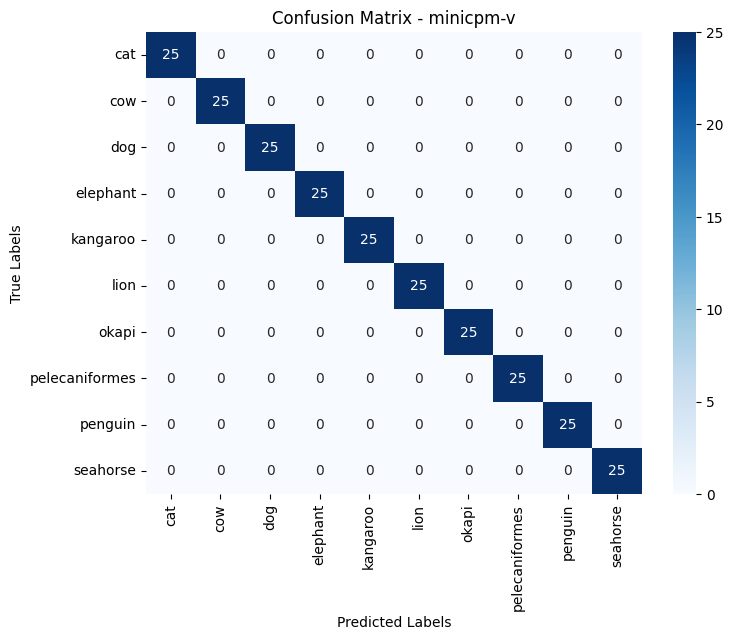

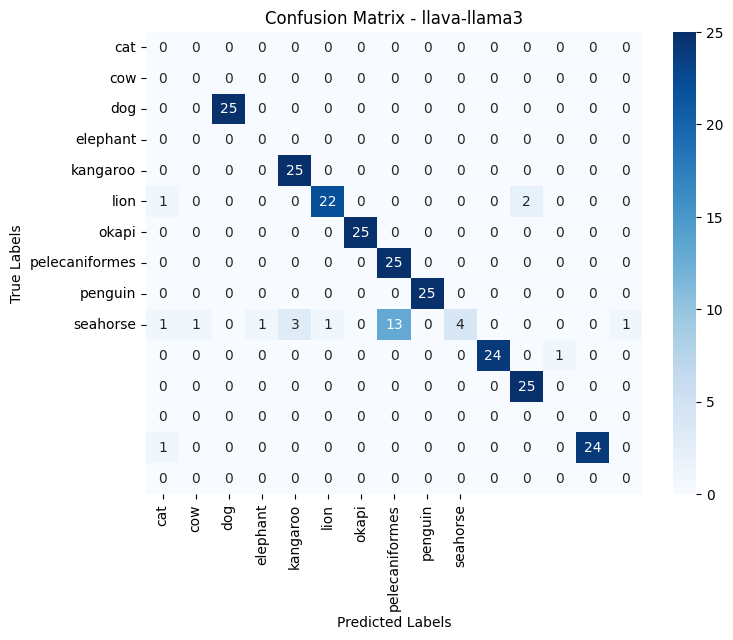

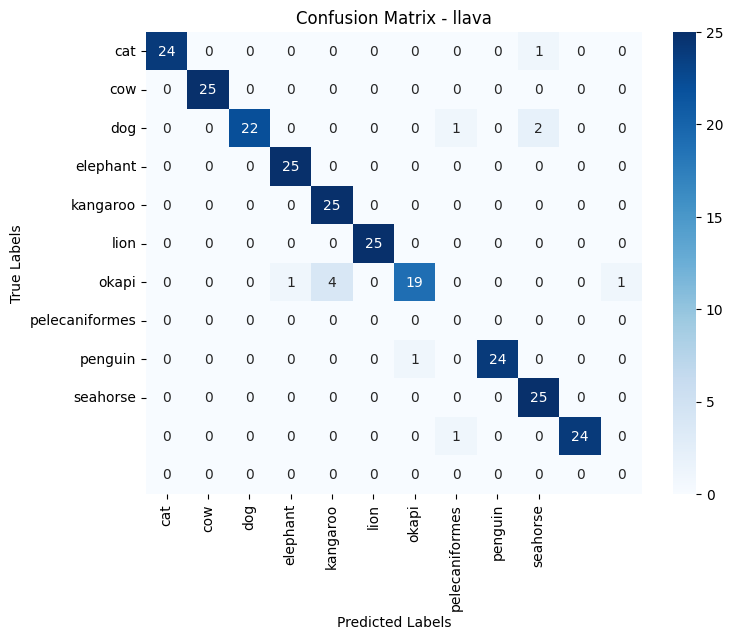

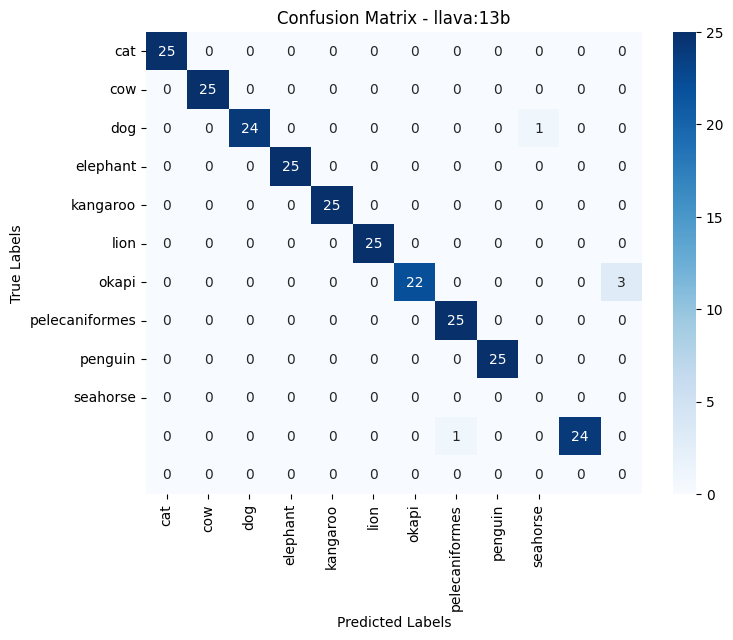

In [22]:
# Get unique models from the final_results
unique_models = final_results['model'].unique()

# Create a mapping of model names to their result columns
model_to_column = {model: f"{model}_result" for model in unique_models}

# Plot confusion matrix for each unique model
for model in unique_models:
    column = model_to_column[model]
    if column in results_ollama_cleaned.columns:
        plot_confusion_matrix(true_categories, results_ollama_cleaned[column], model)

Confusion Matrix of models via OpenAI

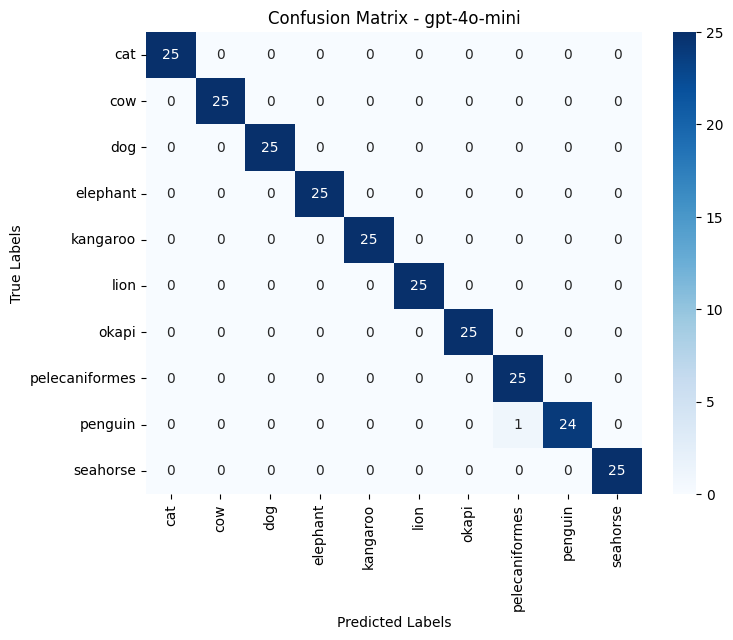

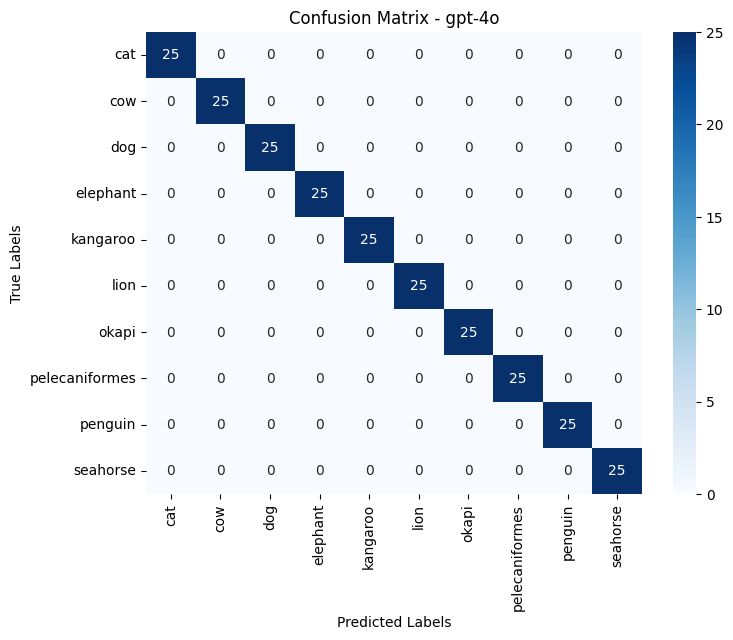

In [23]:
# Get unique models from the final_results
unique_models = final_results['model'].unique()

# Create a mapping of model names to their result columns
model_to_column = {model: f"{model}_result" for model in unique_models}

# Plot confusion matrix for each unique model
for model in unique_models:
    column = model_to_column[model]
    if column in results_openai.columns:
        plot_confusion_matrix(true_categories, results_openai[column], model)

Confusion Matrix of Gemini models via Google

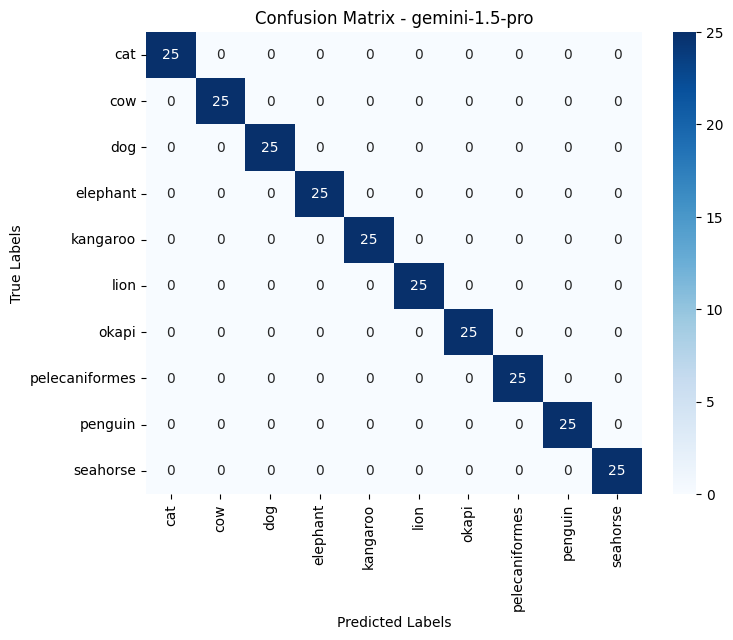

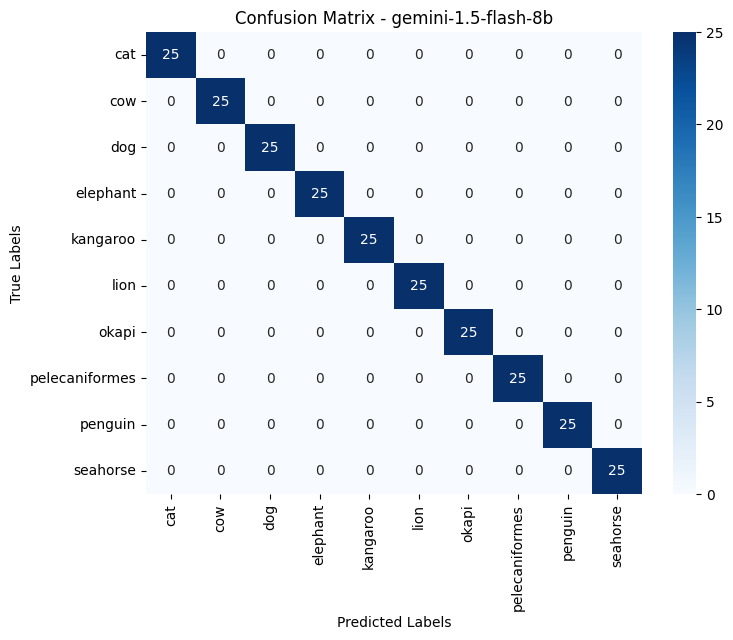

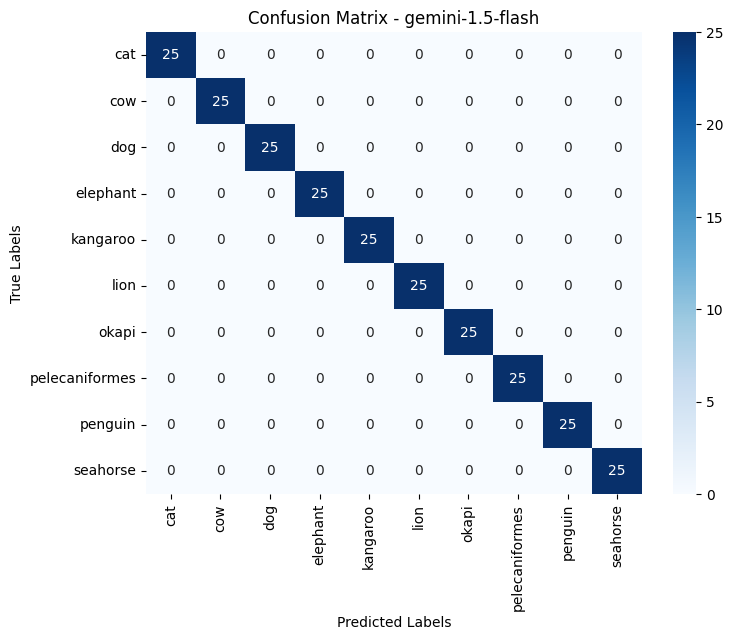

In [24]:
# Get unique models from the final_results
unique_models = final_results['model'].unique()

# Create a mapping of model names to their result columns
model_to_column = {model: f"{model}_result" for model in unique_models}

# Plot confusion matrix for each unique model
for model in unique_models:
    column = model_to_column[model]
    if column in results_gemini.columns:
        plot_confusion_matrix(true_categories, results_gemini[column], model)